#**PreProcessing**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from nltk.tokenize import sent_tokenize, word_tokenize 
import gensim 
from gensim.models import Word2Vec 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
import seaborn as sns
plt.style.use("seaborn")

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   news_id           2006 non-null   int64  
 1   url               2006 non-null   object 
 2   publisher         2006 non-null   object 
 3   publish_date      1992 non-null   object 
 4   author            2005 non-null   object 
 5   Title             2005 non-null   object 
 6   Image             2006 non-null   object 
 7   Text              2006 non-null   object 
 8   news_guard_score  1971 non-null   float64
 9   mbfc_level        2006 non-null   object 
 10  political_bias    1809 non-null   object 
 11  country           1970 non-null   object 
 12  Label             2006 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 190.1+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Real and Fake texts')

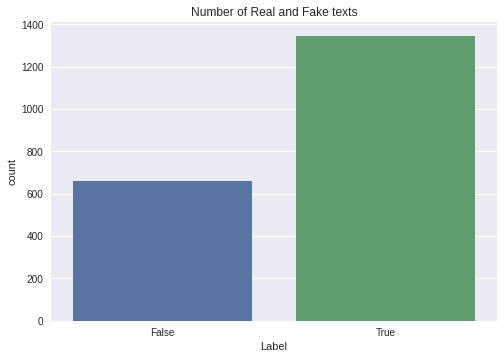

In [ ]:
#####################################################         Reading CSV        #################################################

from google.colab import drive
drive.mount('/content/drive')


PATH = os.getcwd()
DATADIR = PATH + '/drive/My Drive/Ds/D4.csv'
df = pd.read_csv(DATADIR,delimiter=',',encoding='latin-1')

df.info()     ############## To check dataframe df obtained from importing csv
sns.countplot(df.Label)
plt.xlabel('Label')
plt.title('Number of Real and Fake texts')
#plt.savefig('try.jpg')

In [ ]:
#data.info()         ########### To check new dataframe - data
#sns.countplot(data.type)
#plt.xlabel('Label')
#plt.title('Number of Real and Fake texts')
#data.type.value_counts()

In [ ]:
df.head()
df['Label'].value_counts()
#df['main_img_url'].value_counts()
#df.head()

True     1345
False     661
Name: Label, dtype: int64

In [ ]:
#print(tr,fs)
data = df[["Label","Text","Title","Image"]]
print(data['Label'].value_counts())
data.columns

True     1345
False     661
Name: Label, dtype: int64


Index(['Label', 'Text', 'Title', 'Image'], dtype='object')

In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)    # Randomly shuffling the dataframe rows
data.reset_index(drop = True, inplace = True) 

In [ ]:
#data.to_csv(PATH + '/drive/My Drive/B.Tech Minor Project/Dataset/Dataset_Final.csv')  ######################  To covert working dataframe to csv 
#PATH = os.getcwd()
#DATADIR = PATH + '/drive/My Drive/B.Tech Minor Project/Dataset/Dataset_Final.csv'
#df1 = pd.read_csv(DATADIR,delimiter=',',encoding='latin-1')

In [ ]:
CATEGORIES = ['True', 'False']
LENDIR=len(CATEGORIES)

#############################################################      Reading Image URL       ########################################################
from google.colab.patches import cv2_imshow
from skimage import io
import cv2
import urllib
import numpy as np
import imutils
from matplotlib import pyplot as plt

x=0
for i, j in data.iterrows(): 
  link=j["Label"]
  print(link)
  if(x%500==0):
    print(x)
  try:
    img_array = imutils.url_to_image(link)
    #print('1')
    #img_array=cv2.imread(link);
    #print(img_array)
    #cv2_imshow(img_array)
    ret,thresh_img1 = cv2.threshold(img_array,127,255,cv2.THRESH_BINARY)
    cv2_imshow(thresh_img1)
    #ret2,thresh_img2 = cv2.threshold(img_array,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    #cv2_imshow(thresh_img2)
    new_array = cv2.resize(thresh_img1, (128,128))
    cv2_imshow(new_array)
    x=x+1
    print(new_array.shape)
  except Exception as e:  # in the interest in keeping the output clean... 
    #data.drop(data[ data['main_img_url'] == link ].index, inplace = True)
    print('2')
    pass
    #print(i,j)
  if(x==5): 
    break;   #.....show only one

IMG_SIZE = 128




Streaming output truncated to the last 5000 lines.
0
2
False
0
2
True
0
2
True
0
2
True
0
2
False
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
False
0
2
True
0
2
False
0
2
False
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
False
0
2
False
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
False
0
2
True
0
2
True
0
2
False
0
2
True
0
2
True
0
2
True
0
2
False
0
2
True
0
2
True
0
2
True
0
2
True
0
2
False
0
2
True
0
2
True
0
2
False
0
2
True
0
2
False
0
2
True
0
2
False
0
2
False
0
2
True
0
2
True
0
2
True
0
2
False
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
False
0
2
False
0
2
False
0
2
False
0
2
False
0
2
False
0
2
False
0
2
False
0
2
True
0
2
False
0
2
False
0
2
True
0
2
False
0
2
True
0
2
True
0
2
True
0
2
True
0
2
False
0
2
True
0
2
True
0
2
False
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0
2
True
0


In [ ]:
#################################################################    Lables Encoding    #######################################################
labelencoder = LabelEncoder()
#for i,j in data.iterrows():
  #j['type'] = labelencoder.fit_transform(j['type'])
Y = data.Label
Y = labelencoder.fit_transform(Y)
print(len(Y))
print(Y[:5])

2006
[0 1 0 0 1]


In [ ]:
##################################################################      Reading Image and directly convert to pixel array        ###########################################################
from google.colab.patches import cv2_imshow
from skimage import io
import cv2
import urllib
import numpy as np
import imutils

training_data_img = []

def create_training_data():
 
  x=0
  for i, j in data.iterrows(): 
    
    link=j['Image']
    #print(link)
    if(x%500==0):
      print(x)

    try:
      #img_array=io.imread(link);
      img_array = imutils.url_to_image(link)
      #print('1')
      #img_array=cv2.imread(link);
      #print(img_array)
      #cv2_imshow(img_array)
      ret,thresh_img1 = cv2.threshold(img_array,127,255,cv2.THRESH_BINARY)
      new_array = cv2.resize(thresh_img1, (128,128))
      #cv2_imshow(new_array)
      #print(new_array)
      #print(new_array.shape)
      x=x+1
      training_data_img.append([new_array,Y[i]])
      #print('1')
    except Exception as e:  # in the interest in keeping the output clean... 
      data.drop(data[ data['Image'] == link ].index, inplace = True)
      print('2')
      pass
      #print(i,j) 
 
create_training_data()
 
print(len(training_data_img))

0
2
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
500
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [ ]:
print(type(training_data_img))            ######################  Checking the created image training data 
print(np.array(training_data_img).shape)
print(len(data))
#print(training_data_img[0])
#print(len(training_data_img[0][0]))
#print(len(training_data_img[0][0][0]))

<class 'list'>
(4888, 2)
4888


In [ ]:
#############################################################     Reshaping the image data   ######################################### 
X_img = []
labels = []
IMG_SIZE = 128

for features,label in training_data_img:
    X_img.append(features)
    labels.append(label)
 
#print(type(X_img))
#print(len(training_data_img))
#print(len(X_img))
#print(np.array(X_img).shape)
#print(np.array(X_img[0]).shape)
#print(np.array(X_img[0]))
#X_img = (np.array(X_img).astype(X_img))
X_img = np.array(X_img).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
#X_img = X_img/255.0
#print(np.array(training_data_img[0]).shape)
#print(np.array(X_img[0]).shape)
#X_img = np.array(training_data_img).reshape(-1, (IMG_SIZE, IMG_SIZE, 3))
#np.array(X_img).reshape(IMG_SIZE,IMG_SIZE,(3))

In [ ]:
X_img = X_img/255.0

In [ ]:
print(type(X_img))
print((X_img).shape)
print(len(training_data_img))
print(X_img[0])

<class 'numpy.ndarray'>
(4888, 128, 128, 3)
4888
[[[1.         1.         1.        ]
  [0.98431373 0.98431373 0.98431373]
  [0.98431373 0.98431373 0.98431373]
  ...
  [0.98431373 0.98431373 0.98431373]
  [0.98431373 0.98431373 0.98431373]
  [1.         1.         1.        ]]

 [[0.81176471 0.81176471 0.81176471]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [0.         0.         0.        ]]

 [[0.81176471 0.81176471 0.81176471]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [0.         0.         0.        ]]

 ...

 [[0.98431373 0.98431373 0.98431373]
  [0.         0.         0.        ]
  [0.0627451  0.0627451  0.0627451 ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.18823529 0.18823529 

In [ ]:
##############################################################      Reading Text       ################################################

X_text = data.Text

#X1,X2,Y1,Y2 = train_test_split(X_text,y_text,test_size=0.30)
X_text = X_text.astype(str)

max_words = 1000
max_len = 300
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_text)
sequences_1 = tok.texts_to_sequences(X_text) ###name training_data_text
training_data_text = sequence.pad_sequences(sequences_1,maxlen=max_len)


In [ ]:
print(type(training_data_text))
print((training_data_text).shape)
print(len(training_data_text))
print(training_data_text[0])

<class 'numpy.ndarray'>
(4888, 300)
4888
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  

In [ ]:
##############################################################      Reading Title      ################################################

X_title = data.Title

#X1,X2,Y1,Y2 = train_test_split(X_text,y_text,test_size=0.30)
X_title = X_title.astype(str)

max_words = 1000
max_len = 300
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_title)
sequences_2 = tok.texts_to_sequences(X_title) ###### name training_data_title
training_data_title = sequence.pad_sequences(sequences_2,maxlen=max_len)


In [ ]:
print(type(training_data_title))
print((training_data_title).shape)
print(len(training_data_title))
print(training_data_title[0])

<class 'numpy.ndarray'>
(4888, 300)
4888
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  

In [ ]:
###################################################################### Final Train and Test set #############################################

fin_X = []

total_data = len(training_data_text)
for i in range(4888):
  fin_X.append([X_img[i], training_data_text[i], training_data_title[i]])


In [ ]:
print(len(fin_X))
print(np.array(fin_X).shape)
print(labels[0:5])

4888
(4888, 3)
[1, 1, 1, 1, 1]


In [ ]:
print(type(fin_X))
print(np.array(fin_X[0]).shape)
print(len(fin_X))
print(fin_X[0][0])
print("Hello")
print(fin_X[1][0])
print("Hello")
print(fin_X[2][0])
#print("Hello")
#print(fin_X[0][1])
#print("Hello")
#print(fin_X[0][2])

<class 'list'>
(3,)
4888
[[[1.         1.         1.        ]
  [0.98431373 0.98431373 0.98431373]
  [0.98431373 0.98431373 0.98431373]
  ...
  [0.98431373 0.98431373 0.98431373]
  [0.98431373 0.98431373 0.98431373]
  [1.         1.         1.        ]]

 [[0.81176471 0.81176471 0.81176471]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [0.         0.         0.        ]]

 [[0.81176471 0.81176471 0.81176471]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [0.         0.         0.        ]]

 ...

 [[0.98431373 0.98431373 0.98431373]
  [0.         0.         0.        ]
  [0.0627451  0.0627451  0.0627451 ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.18823529 0.18823529 0.18823529]
  [0.4627451

In [ ]:
#########################################################################     Splitting final set to train and test     #########################################

X_train,X_test,Y_train,Y_test = train_test_split(fin_X,labels,test_size=0.30)

#print(Y_train[0])

In [ ]:
print(type(X_train))
print(np.array(X_train).shape)
print(np.array(X_train[0][0]).shape)
print(np.array(X_train[0][1]).shape)
print(np.array(X_train[0][2]).shape)
print(len(X_train))
print(type(X_train))
print(type(X_train[0]))
print(type(X_train[0][0]))
print(type(X_train[0][1]))
print(type(X_train[0][2]))
print(type(Y_train))
print(type(Y_train[0]))
print((Y_train[0]))

print(type(X_test[0][0]))

print(type(Y_test))
print(np.array(Y_train).shape)
print(len(Y_train))

#print(X_train[0],Y_train[0])

<class 'list'>
(3421, 3)
(128, 128, 3)
(300,)
(300,)
3421
<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.int64'>
1
<class 'numpy.ndarray'>
<class 'list'>
(3421,)
3421


#CNN for Image

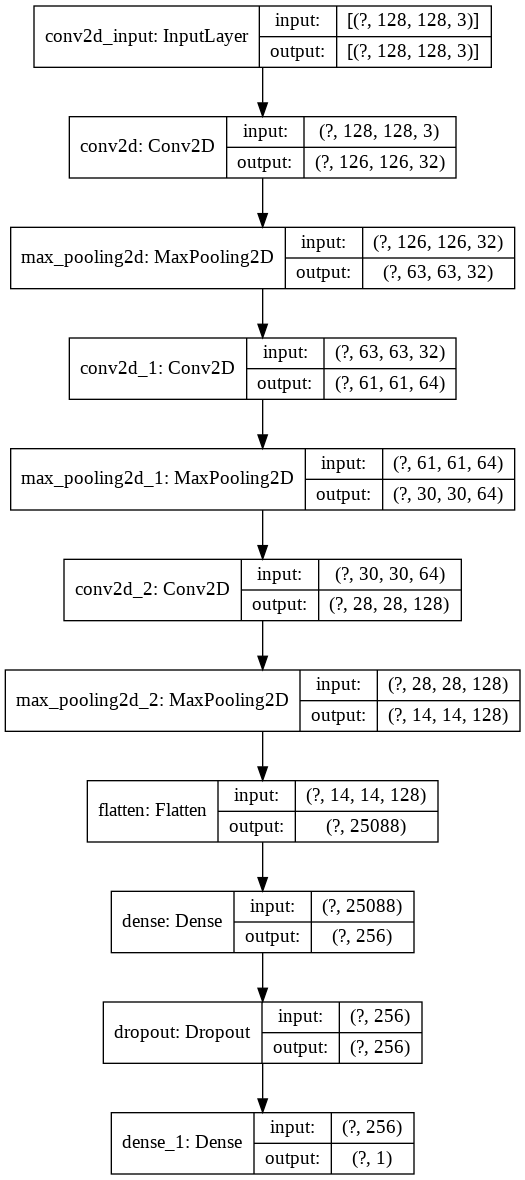

In [ ]:
########################################################################     CNN model for images    ############################################################
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

############## Part 1 - Initialising the CNN ------>
classifier_img = Sequential()

###### Convolution layer1 ->
classifier_img.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
classifier_img.add(MaxPooling2D(pool_size = (2, 2)))

###### Convolution layer2 ->
classifier_img.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier_img.add(MaxPooling2D(pool_size = (2, 2)))

###### Convolution layer3 ->
classifier_img.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier_img.add(MaxPooling2D(pool_size = (2, 2)))

###### Flattening ->
classifier_img.add(Flatten())

###### Full Connection ->
classifier_img.add(Dense(units = 256, activation = 'relu'))
classifier_img.add(Dropout(0.4))
classifier_img.add(Dense(units = 1, activation = 'sigmoid'))  ####output1
plot_model(classifier_img, to_file='classifier_img_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(classifier_img.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0

In [ ]:
##########################################################################       Compilation     #####################################################

classifier_img.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])             


In [ ]:
#######################################################  Extracting image data from final train and test dataset     #######################################
X_train_img = []            
X_test_img = []                 

for i in range(len(X_train)):
  temp1 = X_train[i][0].tolist()
  X_train_img.append(temp1)
  
for i in range(len(X_test)):
  temp1 = X_test[i][0].tolist()
  X_test_img.append(temp1)
 

In [ ]:
print(type(X_train_img))
X_train_img = np.array(X_train_img)
print(type(X_train_img))
print(np.array(X_train_img).shape)
print(len(X_train_img))

print(type(X_test_img))
X_test_img = np.array(X_test_img)
print(type(X_test_img))
print(np.array(X_test_img).shape)
print(len(X_test_img))

print(type(Y_train))
Y_train = np.array(Y_train)
print(type(Y_train))
print(np.array(Y_train).shape)
print(len(Y_train))

print(type(Y_test))
Y_test = np.array(Y_test)
print(type(Y_test))
print(np.array(Y_test).shape)
print(len(Y_test))

<class 'list'>
<class 'numpy.ndarray'>
(3421, 128, 128, 3)
3421
<class 'list'>
<class 'numpy.ndarray'>
(1467, 128, 128, 3)
1467
<class 'list'>
<class 'numpy.ndarray'>
(3421,)
3421
<class 'list'>
<class 'numpy.ndarray'>
(1467,)
1467


In [ ]:
##############################################################################    Training of CNN over Images    ###################################################
#history1 = classifier_img.fit(X_train_img,Y_train,batch_size=4,epochs=15,verbose=1,validation_data=(X_test_img,Y_test))      ##########   validation on Test set 
history1 = classifier_img.fit(X_train_img,Y_train,batch_size=64,epochs=15,verbose=1,validation_split=0.3)                      ##########   validation on a subset from Train set
##################### list all data in history
print(history1.history.keys())

Epoch 1/15
38/38 [==============================] - 41s 1s/step - loss: 0.5639 - accuracy: 0.8012 - val_loss: 0.4897 - val_accuracy: 0.8169
Epoch 2/15
38/38 [==============================] - 41s 1s/step - loss: 0.4676 - accuracy: 0.8074 - val_loss: 0.4182 - val_accuracy: 0.8325
Epoch 3/15
38/38 [==============================] - 41s 1s/step - loss: 0.4041 - accuracy: 0.8338 - val_loss: 0.3595 - val_accuracy: 0.8539
Epoch 4/15
38/38 [==============================] - 40s 1s/step - loss: 0.3017 - accuracy: 0.8835 - val_loss: 0.3400 - val_accuracy: 0.8851
Epoch 5/15
38/38 [==============================] - 43s 1s/step - loss: 0.2192 - accuracy: 0.9148 - val_loss: 0.3015 - val_accuracy: 0.9085
Epoch 6/15
38/38 [==============================] - 41s 1s/step - loss: 0.1425 - accuracy: 0.9495 - val_loss: 0.3234 - val_accuracy: 0.8968
Epoch 7/15
38/38 [==============================] - 41s 1s/step - loss: 0.1331 - accuracy: 0.9490 - val_loss: 0.3495 - val_accuracy: 0.9143
Epoch 8/15
38/38 [==

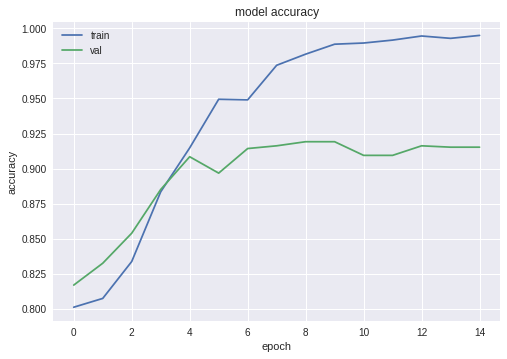

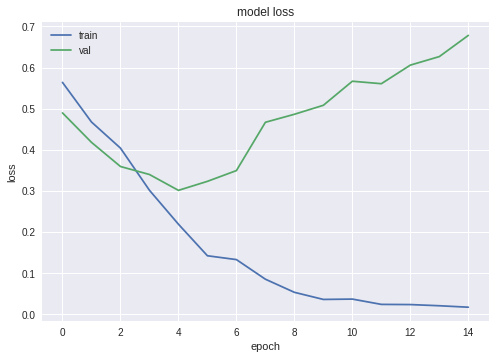

In [ ]:
##################### summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('A1 img acc.png')
plt.show()

###################### summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('A1 img loss.png')
plt.show()


In [ ]:
########################################################################   Results of CNN over Images    ####################################################
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

Y_pred_img = classifier_img.predict_classes(X_test_img)
cm=confusion_matrix(Y_test,Y_pred_img)
print(cm)

classreport_img = classification_report(Y_test, Y_pred_img)
print(classreport_img)
accuracy = accuracy_score(Y_test, Y_pred_img)
print('Accuracy: %f' % accuracy)
print("cohen_kappa_score = ",cohen_kappa_score(Y_test, Y_pred_img))
print("roc_auc_score = ", roc_auc_score(Y_test, Y_pred_img, average='macro'))

#accuracy = accuracy_score(Y_test, Y_pred_img)
#print('Accuracy: %f' % accuracy)
#print(precision_score(Y_test, Y_pred_img, average='macro'))
#print(recall_score(Y_test, Y_pred_img, average='macro'))
#print(f1_score(Y_test, Y_pred_img, average='macro'))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[ 193   77]
 [  49 1148]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       270
           1       0.94      0.96      0.95      1197

    accuracy                           0.91      1467
   macro avg       0.87      0.84      0.85      1467
weighted avg       0.91      0.91      0.91      1467

Accuracy: 0.914110
cohen_kappa_score =  0.7020714865962632
roc_auc_score =  0.8369395711500974


In [ ]:
####################################################################  Prediction Probabilities of Image  #####################################################
Y_pred_prob_img = classifier_img.predict_proba(X_test_img)
print(len(Y_pred_prob_img))
print(type(Y_pred_prob_img))
print(np.array(Y_pred_prob_img).shape)
#print(Y_pred_prob_img[0:10])

Instructions for updating:
Please use `model.predict()` instead.
1467
<class 'numpy.ndarray'>
(1467, 1)


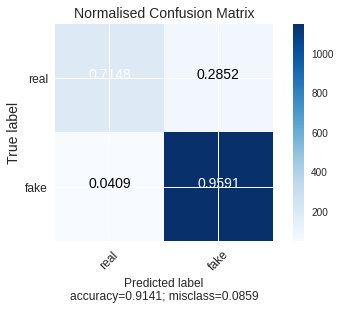

In [ ]:
###################################################################    Blue Cnf matrix and Roc curve for IMG part  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title,fontsize=14)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45, fontsize=12)
    plt.yticks(tick_marks, target_names,fontsize=12)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]), fontsize=14 ,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]), fontsize=14,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=14)
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=12)
  plt.savefig('A1 img cm.png')
  plt.show()
  

plot_confusion_matrix(cm1 =cm, normalize = True,target_names = ['real','fake'],title = "Normalised Confusion Matrix")

#LSTM for Text

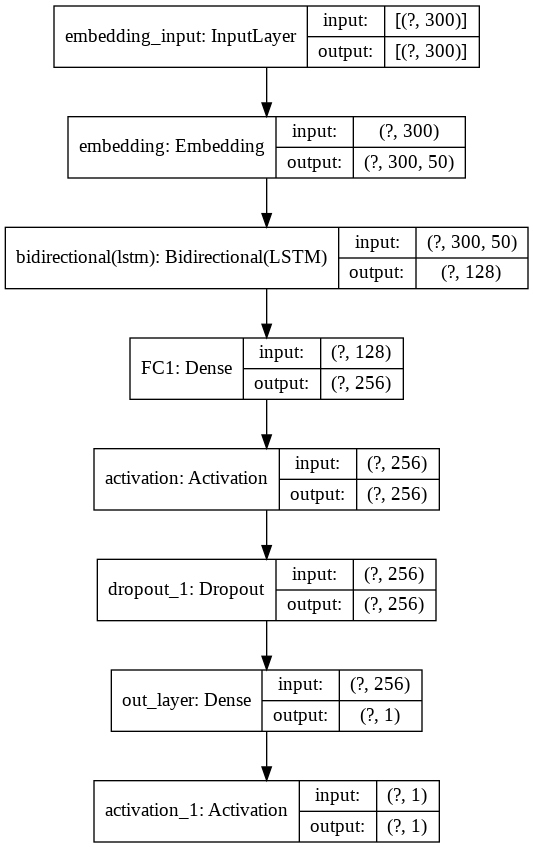

In [ ]:
########################################################################      LSTM model for text     ###############################################

from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Bidirectional
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.vis_utils import plot_model

max_words = 1000
max_len = 300

classifier_text = Sequential()
classifier_text.add(Embedding(max_words,50,input_length=300))
classifier_text.add(Bidirectional(LSTM(64)))
classifier_text.add(Dense(256,name='FC1'))
classifier_text.add(Activation('relu'))
classifier_text.add(Dropout(0.5))
classifier_text.add(Dense(1,name='out_layer'))
classifier_text.add(Activation('sigmoid'))
plot_model(classifier_text, to_file='classifier_text_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(classifier_text.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 50)           50000     
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               58880     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               33024     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                

In [ ]:
##########################################################################        Compilation       ####################################################

classifier_text.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])


In [ ]:
################################################################       Extracting text data from final train and test dataset     #######################################
X_train_text = []

X_test_text = []

for i in range(len(X_train)):
  temp1 = X_train[i][1].tolist()
  X_train_text.append(temp1)
  
for i in range(len(X_test)):
  temp1 = X_test[i][1].tolist()
  X_test_text.append(temp1)
 

In [ ]:
print(type(X_train_text))
X_train_text = np.array(X_train_text)
print(type(X_train_text))
print(np.array(X_train_text).shape)
print(len(X_train_text))

print(type(X_test_text))
X_test_text = np.array(X_test_text)
print(type(X_test_text))
print(np.array(X_test_text).shape)
print(len(X_test_text))

print(type(Y_train))
Y_train = np.array(Y_train)
print(type(Y_train))
print(np.array(Y_train).shape)
print(len(Y_train))

print(type(Y_test))
Y_test = np.array(Y_test)
print(type(Y_test))
print(np.array(Y_test).shape)
print(len(Y_test))

<class 'list'>
<class 'numpy.ndarray'>
(3421, 300)
3421
<class 'list'>
<class 'numpy.ndarray'>
(1467, 300)
1467
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(3421,)
3421
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1467,)
1467


In [ ]:
############################################################      Training LSTM model over text      ###################################
#history2 = classifier_text.fit(X_train_text,Y_train,batch_size=64,epochs=25,verbose=1,validation_data=(X_test_text,Y_test))     ###########  validation on test set
history2 = classifier_text.fit(X_train_text,Y_train,batch_size=64,epochs=25,verbose=1,validation_split = 0.33)                   ###########  validation on a subset of training set 
# list all data in history
print(history2.history.keys())

Epoch 1/25
36/36 [==============================] - 12s 333ms/step - loss: 0.4958 - accuracy: 0.8015 - val_loss: 0.4070 - val_accuracy: 0.8105
Epoch 2/25
36/36 [==============================] - 17s 463ms/step - loss: 0.3396 - accuracy: 0.8586 - val_loss: 0.2762 - val_accuracy: 0.8857
Epoch 3/25
36/36 [==============================] - 13s 357ms/step - loss: 0.2294 - accuracy: 0.8962 - val_loss: 0.2309 - val_accuracy: 0.9061
Epoch 4/25
36/36 [==============================] - 10s 290ms/step - loss: 0.1816 - accuracy: 0.9241 - val_loss: 0.2545 - val_accuracy: 0.9159
Epoch 5/25
36/36 [==============================] - 11s 292ms/step - loss: 0.4680 - accuracy: 0.9045 - val_loss: 0.2270 - val_accuracy: 0.9026
Epoch 6/25
36/36 [==============================] - 10s 291ms/step - loss: 0.1380 - accuracy: 0.9424 - val_loss: 0.2426 - val_accuracy: 0.9176
Epoch 7/25
36/36 [==============================] - 10s 288ms/step - loss: 0.1295 - accuracy: 0.9459 - val_loss: 0.2334 - val_accuracy: 0.9203

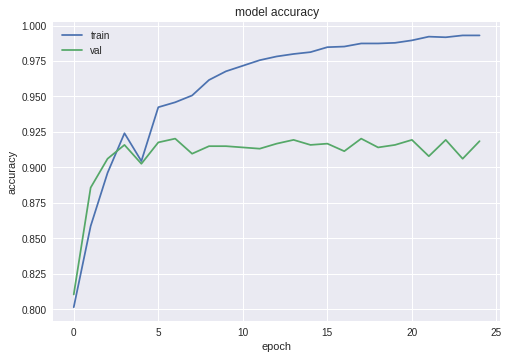

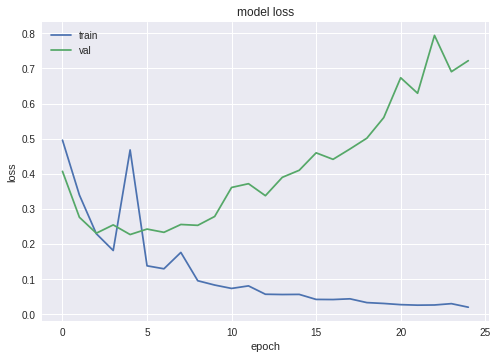

In [ ]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('A1 text acc.png')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('A1 text loss.png')
plt.show()


In [ ]:
###############################################################   Results of LSTM over text    ########################################
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

Y_pred_text = classifier_text.predict_classes(X_test_text)
cm2=confusion_matrix(Y_test,Y_pred_text)
print(cm2)
print(classification_report(Y_test, Y_pred_text))
print("cohen_kappa_score =", cohen_kappa_score(Y_test, Y_pred_text))
print("roc_auc_score =",roc_auc_score(Y_test, Y_pred_text, average='macro'))

accuracy = accuracy_score(Y_test, Y_pred_text)
print('Accuracy: %f' % accuracy)

# print(precision_score(Y_test, Y_pred_text, average='macro'))
# print(recall_score(Y_test, Y_pred_text, average='macro'))
# print(f1_score(Y_test, Y_pred_text, average='macro'))

[[ 199   71]
 [  59 1138]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       270
           1       0.94      0.95      0.95      1197

    accuracy                           0.91      1467
   macro avg       0.86      0.84      0.85      1467
weighted avg       0.91      0.91      0.91      1467

cohen_kappa_score = 0.6997903207525784
roc_auc_score = 0.8438735728209413
Accuracy: 0.911384


In [ ]:
####################################################################  Prediction Probabilities of Text  #####################################################
Y_pred_prob_text = classifier_text.predict_proba(X_test_text)
print(len(Y_pred_prob_text))
print(type(Y_pred_prob_text))
print(np.array(Y_pred_prob_text).shape)
print(Y_pred_prob_text[0:5])

1467
<class 'numpy.ndarray'>
(1467, 1)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


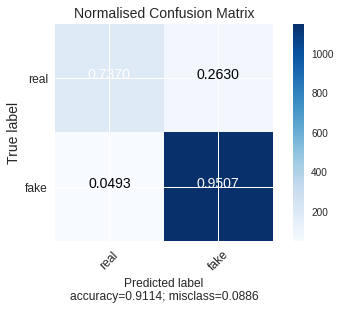

In [ ]:
###################################################################    Blue Cnf matrix and Roc curve for Text part  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title,fontsize=14)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45, fontsize=12)
    plt.yticks(tick_marks, target_names,fontsize=12)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]), fontsize=14 ,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]), fontsize=14,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=14)
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=12)
  plt.savefig('A1 text cm.png')
  plt.show()
  

plot_confusion_matrix(cm1 =cm2, normalize = True,target_names = ['real','fake'],title = "Normalised Confusion Matrix")


In [ ]:
print(len(Y_pred_text))
'''a=0
for i in range(len(Y_pred_text)):
  print(i)
  a+=1
  if(a==10):
    break;'''
print(type(Y_pred_text))
print(Y_pred_text[0:10])

1467
<class 'numpy.ndarray'>
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


#**Title**

In [ ]:
#####################################################################     LSTM model for title      ###############################################

from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.vis_utils import plot_model

max_words = 1000
max_len = 300

classifier_title = Sequential()
classifier_title.add(Embedding(max_words,50,input_length=300))
classifier_title.add(Bidirectional(LSTM(64)))
classifier_title.add(Dense(256,name='FC1'))
classifier_title.add(Activation('relu'))
classifier_title.add(Dropout(0.5))
classifier_title.add(Dense(1,name='out_layer'))
classifier_title.add(Activation('sigmoid'))
plot_model(classifier_title, to_file='classifier_title_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(classifier_title.summary())

In [ ]:
############################################################################       Compilation      ######################################################

classifier_title.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
#####################################################################   Extracting only title data from train and test set   #############################################
X_train_title = []

X_test_title = []

for i in range(len(X_train)):
  temp1 = X_train[i][2].tolist()
  X_train_title.append(temp1)
  
for i in range(len(X_test)):
  temp1 = X_test[i][2].tolist()
  X_test_title.append(temp1)

In [ ]:
print(type(X_train_title))
X_train_title = np.array(X_train_title)
print(type(X_train_title))
print(np.array(X_train_title).shape)
print(len(X_train_title))

print(type(X_test_title))
X_test_title = np.array(X_test_title)
print(type(X_test_title))
print(np.array(X_test_title).shape)
print(len(X_test_title))

print(type(Y_train))
Y_train = np.array(Y_train)
print(type(Y_train))
print(np.array(Y_train).shape)
print(len(Y_train))

print(type(Y_test))
Y_test = np.array(Y_test)
print(type(Y_test))
print(np.array(Y_test).shape)
print(len(Y_test))

print(X_train_title[0])

In [ ]:
###################################################################      Training LSTM model over title     ##############################################
#history3 = classifier_title.fit(X_train_title,Y_train,batch_size=64,epochs=25,verbose=1,validation_data=(X_test_title,Y_test)) ###########   validation on test set
history3 = classifier_title.fit(X_train_title,Y_train,batch_size=64,epochs=25,verbose=1,validation_split=0.33)                   ###########   validation on a subset of training set 
# list all data in history
print(history3.history.keys())

In [ ]:
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('A1 title acc.png')
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.savefig('A1 title loss.png')

In [ ]:
###################################################   Results of LSTM over title    ########################################
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

Y_pred_title = classifier_title.predict_classes(X_test_title)
cm3=confusion_matrix(Y_test,Y_pred_title)
print(cm3)
print(classification_report(Y_test,Y_pred_title))

print("cohen_kappa_score = ", cohen_kappa_score(Y_test, Y_pred_title))
print("roc_auc_score = ", roc_auc_score(Y_test, Y_pred_title, average='macro'))
#accr3 = classifier_title.evaluate(X_test_title,Y_test)
#print('Test set  Loss: {:0.3f}  Accuracy: {:0.3f}'.format(accr3[0],accr3[1]))

accuracy = accuracy_score(Y_test, Y_pred_title)
print('Accuracy: %f' % accuracy)
# print(precision_score(Y_test, Y_pred_title, average='macro'))
# print(recall_score(Y_test, Y_pred_title, average='macro'))
# print(f1_score(Y_test, Y_pred_title, average='macro'))

In [ ]:
####################################################################  Prediction Probabilities of Title  #####################################################
Y_pred_prob_title = classifier_title.predict_proba(X_test_title)
print(len(Y_pred_prob_title))
print(type(Y_pred_prob_title))
print(np.array(Y_pred_prob_title).shape)
print(Y_pred_prob_title[0:5])

In [ ]:
###################################################################    Blue Cnf matrix and Roc curve for Title part  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title,fontsize=14)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45, fontsize=12)
    plt.yticks(tick_marks, target_names,fontsize=12)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]), fontsize=14 ,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]), fontsize=14,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=14)
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=12)
  plt.show()
  plt.savefig('A1 title cm.png')

plot_confusion_matrix(cm1 =cm3, normalize = True,target_names = ['real','fake'],title = "Normalised Confusion Matrix")


#**Weighted Average Fusion** (Multiplicative Combination)

In [ ]:
# ####################################################################     Combining Results of all 2 Classifiers (Late Fusion)  ##############################################
fin_Y_pred_prob = []
w1 = 0.30
w2 = 0.70
#w3 = 0.3
for i in range(len(Y_test)):
  temp = (Y_pred_prob_img[i]*w1 + Y_pred_prob_text[i]*w2)/(w1+w2)
  if(temp>=0.5):
    temp = 1
  else:
    temp = 0
  fin_Y_pred_prob.append(temp)

print(type(fin_Y_pred_prob))
print(len(fin_Y_pred_prob))
print(np.array(fin_Y_pred_prob))

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

cm_final=confusion_matrix(Y_test,fin_Y_pred_prob)
print(cm_final)
print("\n")


<class 'list'>
1467
[1 1 1 ... 1 0 1]
[[ 199   71]
 [  55 1142]]




<-------------Final Combined Confusion Matrix------------------->




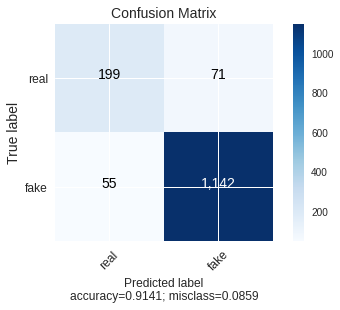

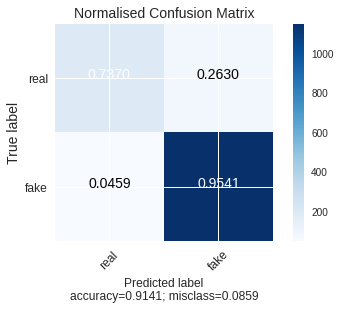



<---------------Final Classification Report-------------------->
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       270
           1       0.94      0.95      0.95      1197

    accuracy                           0.91      1467
   macro avg       0.86      0.85      0.85      1467
weighted avg       0.91      0.91      0.91      1467



Final roc_auc_score : 0.845544416597048


Final Accuracy : 0.914110


In [ ]:
###################################################################    Blue Cnf matrix after Late Fusion(By Prediction Probabilities)  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title,fontsize=14)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45, fontsize=12)
    plt.yticks(tick_marks, target_names,fontsize=12)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]), fontsize=14 ,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]), fontsize=14,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=14)
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=12)
  plt.savefig('A1 fusion cm.png')
  plt.show()
  

print("<-------------Final Combined Confusion Matrix------------------->")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = False,target_names = ['real','fake'],title = "Confusion Matrix")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = True,target_names = ['real','fake'],title = "Normalised Confusion Matrix")
print("\n")
print("<---------------Final Classification Report-------------------->")
print(classification_report(Y_test,fin_Y_pred_prob))
print("\n")
print("Final roc_auc_score :",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
print("\n")
fin_accuracy = accuracy_score(Y_test, fin_Y_pred_prob)
print('Final Accuracy : %f' % fin_accuracy)

#**Average Fusion** (Additive Fusion)

In [ ]:
# ####################################################################     Combining Results of all 2 Classifiers (Late Fusion)  ##############################################
fin_Y_pred_prob = []
w1 = 0.30
w2 = 0.70
#w3 = 0.3
for i in range(len(Y_test)):
  temp = (Y_pred_prob_img[i] + Y_pred_prob_text[i])/2
  if(temp>=0.5):
    temp = 1
  else:
    temp = 0
  fin_Y_pred_prob.append(temp)

print(type(fin_Y_pred_prob))
print(len(fin_Y_pred_prob))
print(np.array(fin_Y_pred_prob))

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

cm_final=confusion_matrix(Y_test,fin_Y_pred_prob)
print(cm_final)
print("\n")

<class 'list'>
1467
[1 1 1 ... 1 0 1]
[[ 192   78]
 [  22 1175]]




<-------------Final Combined Confusion Matrix------------------->




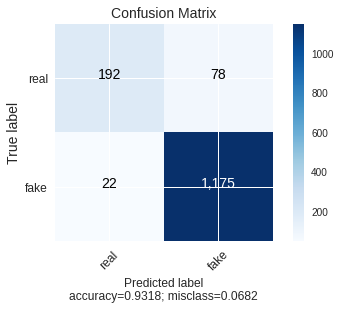

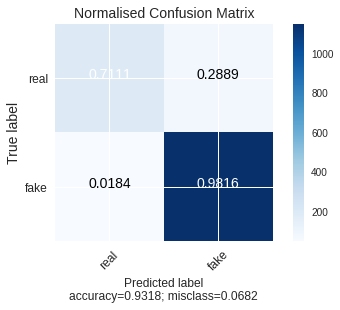



<---------------Final Classification Report-------------------->
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       270
           1       0.94      0.98      0.96      1197

    accuracy                           0.93      1467
   macro avg       0.92      0.85      0.88      1467
weighted avg       0.93      0.93      0.93      1467



Final roc_auc_score : 0.8463659147869674


Final Accuracy : 0.931834


In [ ]:
###################################################################    Blue Cnf matrix after Late Fusion(By Prediction Probabilities)  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title,fontsize=14)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45, fontsize=12)
    plt.yticks(tick_marks, target_names,fontsize=12)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]), fontsize=14 ,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]), fontsize=14,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=14)
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=12)
  plt.savefig('A1 fusion cm.png')
  plt.show()
  

print("<-------------Final Combined Confusion Matrix------------------->")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = False,target_names = ['real','fake'],title = "Confusion Matrix")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = True,target_names = ['real','fake'],title = "Normalised Confusion Matrix")
print("\n")
print("<---------------Final Classification Report-------------------->")
print(classification_report(Y_test,fin_Y_pred_prob))
print("\n")
print("Final roc_auc_score :",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
print("\n")
fin_accuracy = accuracy_score(Y_test, fin_Y_pred_prob)
print('Final Accuracy : %f' % fin_accuracy)

#**Sum Fusion**

In [ ]:
# ####################################################################     Combining Results of all 2 Classifiers (Late Fusion)  ##############################################
fin_Y_pred_prob = []
w1 = 0.50
w2 = 0.50
#w3 = 0.3
for i in range(len(Y_test)):
  temp = (Y_pred_prob_img[i] + Y_pred_prob_text[i])
  if(temp>=0.5):
    temp = 1
  else:
    temp = 0
  fin_Y_pred_prob.append(temp)

print(type(fin_Y_pred_prob))
print(len(fin_Y_pred_prob))
print(np.array(fin_Y_pred_prob))

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

cm_final=confusion_matrix(Y_test,fin_Y_pred_prob)
print(cm_final)
print("\n")


<class 'list'>
1467
[1 1 1 ... 1 1 1]
[[ 168  102]
 [   3 1194]]




<-------------Final Combined Confusion Matrix------------------->




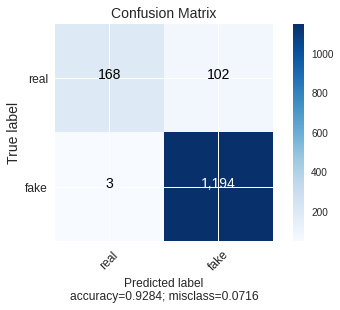

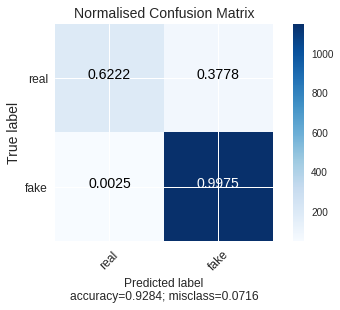



<---------------Final Classification Report-------------------->
              precision    recall  f1-score   support

           0       0.98      0.62      0.76       270
           1       0.92      1.00      0.96      1197

    accuracy                           0.93      1467
   macro avg       0.95      0.81      0.86      1467
weighted avg       0.93      0.93      0.92      1467



Final roc_auc_score : 0.8098579782790309


Final Accuracy : 0.928425


In [ ]:
###################################################################    Blue Cnf matrix after Late Fusion(By Prediction Probabilities)  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title,fontsize=14)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45, fontsize=12)
    plt.yticks(tick_marks, target_names,fontsize=12)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]), fontsize=14 ,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]), fontsize=14,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=14)
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=12)
  plt.savefig('A1 fusion cm.png')
  plt.show()
  

print("<-------------Final Combined Confusion Matrix------------------->")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = False,target_names = ['real','fake'],title = "Confusion Matrix")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = True,target_names = ['real','fake'],title = "Normalised Confusion Matrix")
print("\n")
print("<---------------Final Classification Report-------------------->")
print(classification_report(Y_test,fin_Y_pred_prob))
print("\n")
print("Final roc_auc_score :",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
print("\n")
fin_accuracy = accuracy_score(Y_test, fin_Y_pred_prob)
print('Final Accuracy : %f' % fin_accuracy)

#Max Fusion

In [ ]:
# ####################################################################     Combining Results of all 2 Classifiers (Late Fusion)  ##############################################
fin_Y_pred_prob = []
w1 = 0.50
w2 = 0.50
#w3 = 0.3
for i in range(len(Y_test)):
  temp = max(Y_pred_prob_img[i], Y_pred_prob_text[i])
  if(temp>=0.5):
    temp = 1
  else:
    temp = 0
  fin_Y_pred_prob.append(temp)

print(type(fin_Y_pred_prob))
print(len(fin_Y_pred_prob))
print(np.array(fin_Y_pred_prob))

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

cm_final=confusion_matrix(Y_test,fin_Y_pred_prob)
print(cm_final)
print("\n")


<class 'list'>
1467
[1 1 1 ... 1 1 1]
[[ 170  100]
 [   3 1194]]




<-------------Final Combined Confusion Matrix------------------->




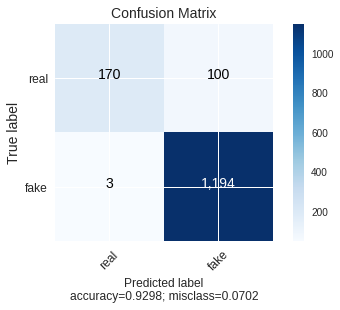

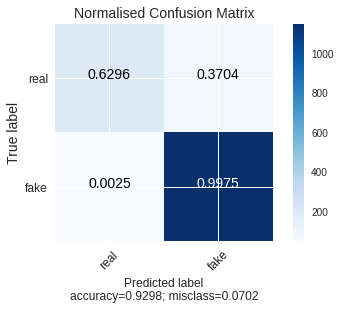



<---------------Final Classification Report-------------------->
              precision    recall  f1-score   support

           0       0.98      0.63      0.77       270
           1       0.92      1.00      0.96      1197

    accuracy                           0.93      1467
   macro avg       0.95      0.81      0.86      1467
weighted avg       0.93      0.93      0.92      1467



Final roc_auc_score : 0.8135616819827346


Final Accuracy : 0.929789


In [ ]:
###################################################################    Blue Cnf matrix after Late Fusion(By Prediction Probabilities)  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title,fontsize=14)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45, fontsize=12)
    plt.yticks(tick_marks, target_names,fontsize=12)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]), fontsize=14 ,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]), fontsize=14,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=14)
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=12)
  plt.savefig('A1 fusion cm.png')
  plt.show()
  

print("<-------------Final Combined Confusion Matrix------------------->")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = False,target_names = ['real','fake'],title = "Confusion Matrix")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = True,target_names = ['real','fake'],title = "Normalised Confusion Matrix")
print("\n")
print("<---------------Final Classification Report-------------------->")
print(classification_report(Y_test,fin_Y_pred_prob))
print("\n")
print("Final roc_auc_score :",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
print("\n")
fin_accuracy = accuracy_score(Y_test, fin_Y_pred_prob)
print('Final Accuracy : %f' % fin_accuracy)

#Other Combinations

In [ ]:
# ####################################################################     Combining Results of all 2 Classifiers (Late Fusion)  ##############################################
fin_Y_pred_prob = []
w1 = 0.7
w2 = 0.3
#w3 = 0.3
for i in range(len(Y_test)):
  temp = (Y_pred_prob_img[i]*w1 + Y_pred_prob_text[i]*w2)/(w1+w2)
  if(temp>=0.5):
    temp = 1
  else:
    temp = 0
  fin_Y_pred_prob.append(temp)

print(type(fin_Y_pred_prob))
print(len(fin_Y_pred_prob))
print(np.array(fin_Y_pred_prob))

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

cm_final=confusion_matrix(Y_test,fin_Y_pred_prob)
print(cm_final)
print("\n")


<class 'list'>
1467
[1 1 1 ... 1 0 1]
[[ 194   76]
 [  35 1162]]




<-------------Final Combined Confusion Matrix------------------->




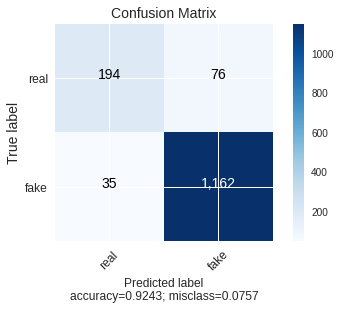

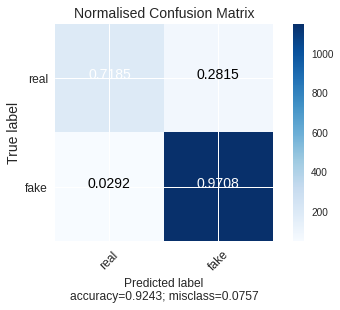



<---------------Final Classification Report-------------------->
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       270
           1       0.94      0.97      0.95      1197

    accuracy                           0.92      1467
   macro avg       0.89      0.84      0.87      1467
weighted avg       0.92      0.92      0.92      1467



Final roc_auc_score : 0.8446393762183236


Final Accuracy : 0.924335


In [ ]:
###################################################################    Blue Cnf matrix after Late Fusion(By Prediction Probabilities)  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title,fontsize=14)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45, fontsize=12)
    plt.yticks(tick_marks, target_names,fontsize=12)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]), fontsize=14 ,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]), fontsize=14,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=14)
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=12)
  plt.savefig('A1 fusion cm.png')
  plt.show()
  

print("<-------------Final Combined Confusion Matrix------------------->")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = False,target_names = ['real','fake'],title = "Confusion Matrix")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = True,target_names = ['real','fake'],title = "Normalised Confusion Matrix")
print("\n")
print("<---------------Final Classification Report-------------------->")
print(classification_report(Y_test,fin_Y_pred_prob))
print("\n")
print("Final roc_auc_score :",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
print("\n")
fin_accuracy = accuracy_score(Y_test, fin_Y_pred_prob)
print('Final Accuracy : %f' % fin_accuracy)

In [ ]:
# ####################################################################     Combining Results of all 2 Classifiers (Late Fusion)  ##############################################
fin_Y_pred_prob = []
w1 = 0.3
w2 = 0.7
#w3 = 0.3
for i in range(len(Y_test)):
  temp = (Y_pred_prob_img[i]*w1 + Y_pred_prob_text[i]*w2)/(w1+w2)
  if(temp>=0.5):
    temp = 1
  else:
    temp = 0
  fin_Y_pred_prob.append(temp)

print(type(fin_Y_pred_prob))
print(len(fin_Y_pred_prob))
print(np.array(fin_Y_pred_prob))

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

cm_final=confusion_matrix(Y_test,fin_Y_pred_prob)
print(cm_final)
print("\n")


<class 'list'>
1467
[1 1 1 ... 1 0 1]
[[ 199   71]
 [  55 1142]]




<-------------Final Combined Confusion Matrix------------------->




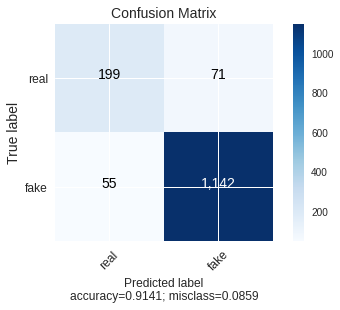

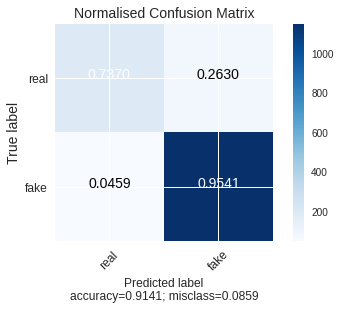



<---------------Final Classification Report-------------------->
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       270
           1       0.94      0.95      0.95      1197

    accuracy                           0.91      1467
   macro avg       0.86      0.85      0.85      1467
weighted avg       0.91      0.91      0.91      1467



Final roc_auc_score : 0.845544416597048


Final Accuracy : 0.914110


In [ ]:
###################################################################    Blue Cnf matrix after Late Fusion(By Prediction Probabilities)  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title,fontsize=14)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45, fontsize=12)
    plt.yticks(tick_marks, target_names,fontsize=12)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]), fontsize=14 ,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]), fontsize=14,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=14)
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=12)
  plt.savefig('A1 fusion cm.png')
  plt.show()
  

print("<-------------Final Combined Confusion Matrix------------------->")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = False,target_names = ['real','fake'],title = "Confusion Matrix")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = True,target_names = ['real','fake'],title = "Normalised Confusion Matrix")
print("\n")
print("<---------------Final Classification Report-------------------->")
print(classification_report(Y_test,fin_Y_pred_prob))
print("\n")
print("Final roc_auc_score :",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
print("\n")
fin_accuracy = accuracy_score(Y_test, fin_Y_pred_prob)
print('Final Accuracy : %f' % fin_accuracy)

In [ ]:
# ####################################################################     Combining Results of all 2 Classifiers (Late Fusion)  ##############################################
fin_Y_pred_prob = []
w1 = 0.8
w2 = 0.2
#w3 = 0.3
for i in range(len(Y_test)):
  temp = (Y_pred_prob_img[i]*w1 + Y_pred_prob_text[i]*w2)/(w1+w2)
  if(temp>=0.5):
    temp = 1
  else:
    temp = 0
  fin_Y_pred_prob.append(temp)

print(type(fin_Y_pred_prob))
print(len(fin_Y_pred_prob))
print(np.array(fin_Y_pred_prob))

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

cm_final=confusion_matrix(Y_test,fin_Y_pred_prob)
print(cm_final)
print("\n")


<class 'list'>
1467
[1 1 1 ... 1 0 1]
[[ 194   76]
 [  40 1157]]




<-------------Final Combined Confusion Matrix------------------->




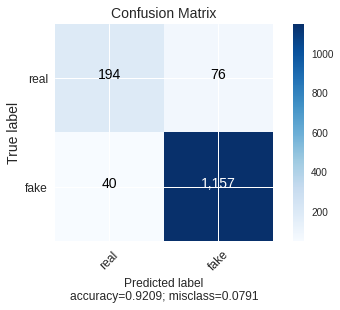

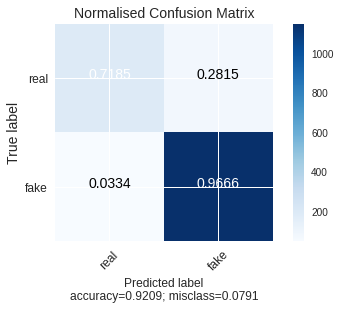



<---------------Final Classification Report-------------------->
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       270
           1       0.94      0.97      0.95      1197

    accuracy                           0.92      1467
   macro avg       0.88      0.84      0.86      1467
weighted avg       0.92      0.92      0.92      1467



Final roc_auc_score : 0.8425508214981899


Final Accuracy : 0.920927


In [ ]:
###################################################################    Blue Cnf matrix after Late Fusion(By Prediction Probabilities)  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title,fontsize=14)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45, fontsize=12)
    plt.yticks(tick_marks, target_names,fontsize=12)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]), fontsize=14 ,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]), fontsize=14,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=14)
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=12)
  plt.savefig('A1 fusion cm.png')
  plt.show()
  

print("<-------------Final Combined Confusion Matrix------------------->")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = False,target_names = ['real','fake'],title = "Confusion Matrix")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = True,target_names = ['real','fake'],title = "Normalised Confusion Matrix")
print("\n")
print("<---------------Final Classification Report-------------------->")
print(classification_report(Y_test,fin_Y_pred_prob))
print("\n")
print("Final roc_auc_score :",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
print("\n")
fin_accuracy = accuracy_score(Y_test, fin_Y_pred_prob)
print('Final Accuracy : %f' % fin_accuracy)

In [ ]:
# ####################################################################     Combining Results of all 2 Classifiers (Late Fusion)  ##############################################
fin_Y_pred_prob = []
w1 = 0.2
w2 = 0.8
#w3 = 0.3
for i in range(len(Y_test)):
  temp = (Y_pred_prob_img[i]*w1 + Y_pred_prob_text[i]*w2)/(w1+w2)
  if(temp>=0.5):
    temp = 1
  else:
    temp = 0
  fin_Y_pred_prob.append(temp)

print(type(fin_Y_pred_prob))
print(len(fin_Y_pred_prob))
print(np.array(fin_Y_pred_prob))

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

cm_final=confusion_matrix(Y_test,fin_Y_pred_prob)
print(cm_final)
print("\n")


<class 'list'>
1467
[1 1 1 ... 1 0 1]
[[ 199   71]
 [  56 1141]]




<-------------Final Combined Confusion Matrix------------------->




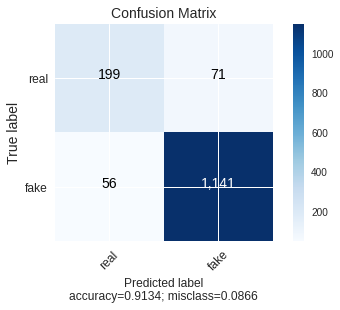

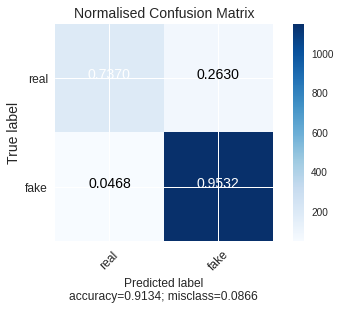



<---------------Final Classification Report-------------------->
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       270
           1       0.94      0.95      0.95      1197

    accuracy                           0.91      1467
   macro avg       0.86      0.85      0.85      1467
weighted avg       0.91      0.91      0.91      1467



Final roc_auc_score : 0.8451267056530214


Final Accuracy : 0.913429


In [ ]:
###################################################################    Blue Cnf matrix after Late Fusion(By Prediction Probabilities)  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title,fontsize=14)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45, fontsize=12)
    plt.yticks(tick_marks, target_names,fontsize=12)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]), fontsize=14 ,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]), fontsize=14,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=14)
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=12)
  plt.savefig('A1 fusion cm.png')
  plt.show()
  

print("<-------------Final Combined Confusion Matrix------------------->")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = False,target_names = ['real','fake'],title = "Confusion Matrix")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = True,target_names = ['real','fake'],title = "Normalised Confusion Matrix")
print("\n")
print("<---------------Final Classification Report-------------------->")
print(classification_report(Y_test,fin_Y_pred_prob))
print("\n")
print("Final roc_auc_score :",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
print("\n")
fin_accuracy = accuracy_score(Y_test, fin_Y_pred_prob)
print('Final Accuracy : %f' % fin_accuracy)

In [ ]:
# ####################################################################     Combining Results of all 2 Classifiers (Late Fusion)  ##############################################
fin_Y_pred_prob = []
w1 = 0.6
w2 = 0.4
#w3 = 0.3
for i in range(len(Y_test)):
  temp = (Y_pred_prob_img[i]*w1 + Y_pred_prob_text[i]*w2)/(w1+w2)
  if(temp>=0.5):
    temp = 1
  else:
    temp = 0
  fin_Y_pred_prob.append(temp)

print(type(fin_Y_pred_prob))
print(len(fin_Y_pred_prob))
print(np.array(fin_Y_pred_prob))

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

cm_final=confusion_matrix(Y_test,fin_Y_pred_prob)
print(cm_final)
print("\n")


<class 'list'>
1467
[1 1 1 ... 1 0 1]
[[ 196   74]
 [  27 1170]]




<-------------Final Combined Confusion Matrix------------------->




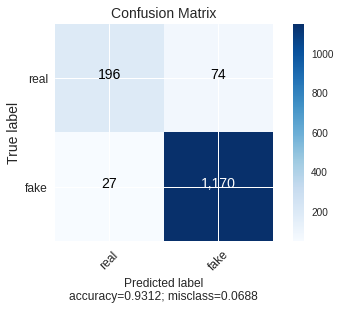

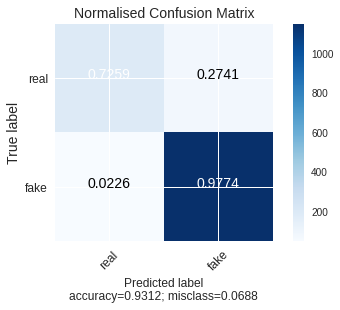



<---------------Final Classification Report-------------------->
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       270
           1       0.94      0.98      0.96      1197

    accuracy                           0.93      1467
   macro avg       0.91      0.85      0.88      1467
weighted avg       0.93      0.93      0.93      1467



Final roc_auc_score : 0.8516847674742412


Final Accuracy : 0.931152


In [ ]:
###################################################################    Blue Cnf matrix after Late Fusion(By Prediction Probabilities)  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title,fontsize=14)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45, fontsize=12)
    plt.yticks(tick_marks, target_names,fontsize=12)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]), fontsize=14 ,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]), fontsize=14,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=14)
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=12)
  plt.savefig('A1 fusion cm.png')
  plt.show()
  

print("<-------------Final Combined Confusion Matrix------------------->")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = False,target_names = ['real','fake'],title = "Confusion Matrix")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = True,target_names = ['real','fake'],title = "Normalised Confusion Matrix")
print("\n")
print("<---------------Final Classification Report-------------------->")
print(classification_report(Y_test,fin_Y_pred_prob))
print("\n")
print("Final roc_auc_score :",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
print("\n")
fin_accuracy = accuracy_score(Y_test, fin_Y_pred_prob)
print('Final Accuracy : %f' % fin_accuracy)

In [ ]:
# ####################################################################     Combining Results of all 2 Classifiers (Late Fusion)  ##############################################
fin_Y_pred_prob = []
w1 = 0.4
w2 = 0.6
#w3 = 0.3
for i in range(len(Y_test)):
  temp = (Y_pred_prob_img[i]*w1 + Y_pred_prob_text[i]*w2)/(w1+w2)
  if(temp>=0.5):
    temp = 1
  else:
    temp = 0
  fin_Y_pred_prob.append(temp)

print(type(fin_Y_pred_prob))
print(len(fin_Y_pred_prob))
print(np.array(fin_Y_pred_prob))

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

cm_final=confusion_matrix(Y_test,fin_Y_pred_prob)
print(cm_final)
print("\n")


<class 'list'>
1467
[1 1 1 ... 1 0 1]
[[ 199   71]
 [  55 1142]]




<-------------Final Combined Confusion Matrix------------------->




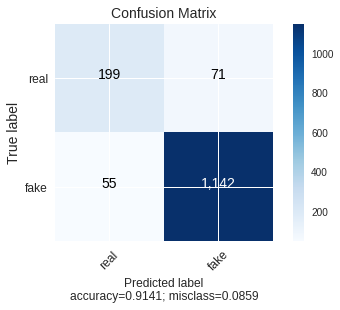

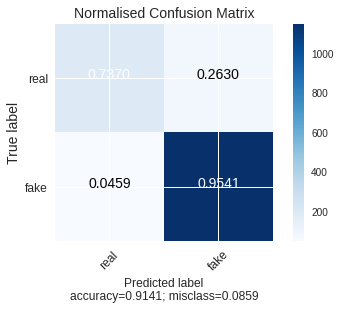



<---------------Final Classification Report-------------------->
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       270
           1       0.94      0.95      0.95      1197

    accuracy                           0.91      1467
   macro avg       0.86      0.85      0.85      1467
weighted avg       0.91      0.91      0.91      1467



Final roc_auc_score : 0.845544416597048


Final Accuracy : 0.914110


In [ ]:
###################################################################    Blue Cnf matrix after Late Fusion(By Prediction Probabilities)  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title,fontsize=14)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45, fontsize=12)
    plt.yticks(tick_marks, target_names,fontsize=12)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]), fontsize=14 ,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]), fontsize=14,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=14)
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=12)
  plt.savefig('A1 fusion cm.png')
  plt.show()
  

print("<-------------Final Combined Confusion Matrix------------------->")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = False,target_names = ['real','fake'],title = "Confusion Matrix")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = True,target_names = ['real','fake'],title = "Normalised Confusion Matrix")
print("\n")
print("<---------------Final Classification Report-------------------->")
print(classification_report(Y_test,fin_Y_pred_prob))
print("\n")
print("Final roc_auc_score :",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
print("\n")
fin_accuracy = accuracy_score(Y_test, fin_Y_pred_prob)
print('Final Accuracy : %f' % fin_accuracy)

In [ ]:
# ####################################################################     Combining Results of all 2 Classifiers (Late Fusion)  ##############################################
fin_Y_pred_prob = []
w1 = 0.75
w2 = 0.25
#w3 = 0.3
for i in range(len(Y_test)):
  temp = (Y_pred_prob_img[i]*w1 + Y_pred_prob_text[i]*w2)/(w1+w2)
  if(temp>=0.5):
    temp = 1
  else:
    temp = 0
  fin_Y_pred_prob.append(temp)

print(type(fin_Y_pred_prob))
print(len(fin_Y_pred_prob))
print(np.array(fin_Y_pred_prob))

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

cm_final=confusion_matrix(Y_test,fin_Y_pred_prob)
print(cm_final)
print("\n")


<class 'list'>
1467
[1 1 1 ... 1 0 1]
[[ 194   76]
 [  37 1160]]




<-------------Final Combined Confusion Matrix------------------->




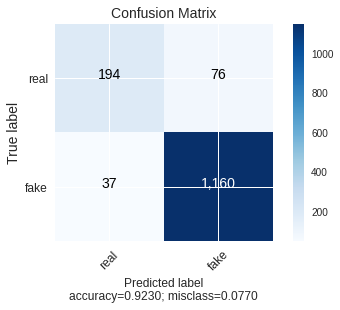

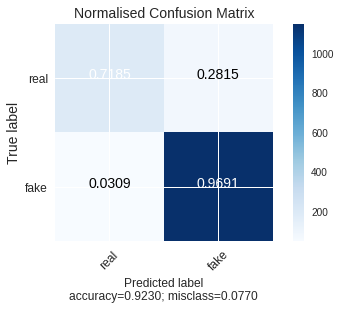



<---------------Final Classification Report-------------------->
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       270
           1       0.94      0.97      0.95      1197

    accuracy                           0.92      1467
   macro avg       0.89      0.84      0.86      1467
weighted avg       0.92      0.92      0.92      1467



Final roc_auc_score : 0.8438039543302701


Final Accuracy : 0.922972


In [ ]:
###################################################################    Blue Cnf matrix after Late Fusion(By Prediction Probabilities)  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title,fontsize=14)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45, fontsize=12)
    plt.yticks(tick_marks, target_names,fontsize=12)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]), fontsize=14 ,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]), fontsize=14,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=14)
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=12)
  plt.savefig('A1 fusion cm.png')
  plt.show()
  

print("<-------------Final Combined Confusion Matrix------------------->")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = False,target_names = ['real','fake'],title = "Confusion Matrix")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = True,target_names = ['real','fake'],title = "Normalised Confusion Matrix")
print("\n")
print("<---------------Final Classification Report-------------------->")
print(classification_report(Y_test,fin_Y_pred_prob))
print("\n")
print("Final roc_auc_score :",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
print("\n")
fin_accuracy = accuracy_score(Y_test, fin_Y_pred_prob)
print('Final Accuracy : %f' % fin_accuracy)

In [ ]:
# ####################################################################     Combining Results of all 2 Classifiers (Late Fusion)  ##############################################
fin_Y_pred_prob = []
w1 = 0.25
w2 = 0.75
#w3 = 0.3
for i in range(len(Y_test)):
  temp = (Y_pred_prob_img[i]*w1 + Y_pred_prob_text[i]*w2)/(w1+w2)
  if(temp>=0.5):
    temp = 1
  else:
    temp = 0
  fin_Y_pred_prob.append(temp)

print(type(fin_Y_pred_prob))
print(len(fin_Y_pred_prob))
print(np.array(fin_Y_pred_prob))

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

cm_final=confusion_matrix(Y_test,fin_Y_pred_prob)
print(cm_final)
print("\n")


<class 'list'>
1467
[1 1 1 ... 1 0 1]
[[ 199   71]
 [  56 1141]]




<-------------Final Combined Confusion Matrix------------------->




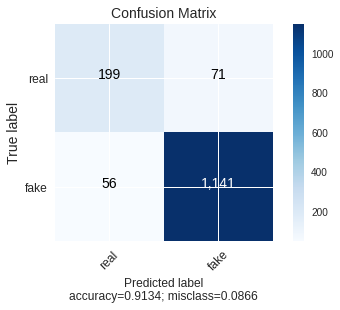

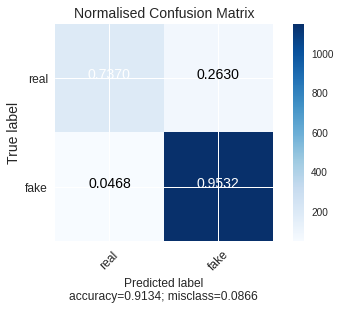



<---------------Final Classification Report-------------------->
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       270
           1       0.94      0.95      0.95      1197

    accuracy                           0.91      1467
   macro avg       0.86      0.85      0.85      1467
weighted avg       0.91      0.91      0.91      1467



Final roc_auc_score : 0.8451267056530214


Final Accuracy : 0.913429


In [ ]:
###################################################################    Blue Cnf matrix after Late Fusion(By Prediction Probabilities)  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title,fontsize=14)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45, fontsize=12)
    plt.yticks(tick_marks, target_names,fontsize=12)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]), fontsize=14 ,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]), fontsize=14,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=14)
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=12)
  plt.savefig('A1 fusion cm.png')
  plt.show()
  

print("<-------------Final Combined Confusion Matrix------------------->")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = False,target_names = ['real','fake'],title = "Confusion Matrix")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = True,target_names = ['real','fake'],title = "Normalised Confusion Matrix")
print("\n")
print("<---------------Final Classification Report-------------------->")
print(classification_report(Y_test,fin_Y_pred_prob))
print("\n")
print("Final roc_auc_score :",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
print("\n")
fin_accuracy = accuracy_score(Y_test, fin_Y_pred_prob)
print('Final Accuracy : %f' % fin_accuracy)

In [ ]:
# ####################################################################     Combining Results of all 2 Classifiers (Late Fusion)  ##############################################
fin_Y_pred_prob = []
w1 = 0.65
w2 = 0.35
#w3 = 0.3
for i in range(len(Y_test)):
  temp = (Y_pred_prob_img[i]*w1 + Y_pred_prob_text[i]*w2)/(w1+w2)
  if(temp>=0.5):
    temp = 1
  else:
    temp = 0
  fin_Y_pred_prob.append(temp)

print(type(fin_Y_pred_prob))
print(len(fin_Y_pred_prob))
print(np.array(fin_Y_pred_prob))

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

cm_final=confusion_matrix(Y_test,fin_Y_pred_prob)
print(cm_final)
print("\n")


<class 'list'>
1467
[1 1 1 ... 1 0 1]
[[ 195   75]
 [  33 1164]]




<-------------Final Combined Confusion Matrix------------------->




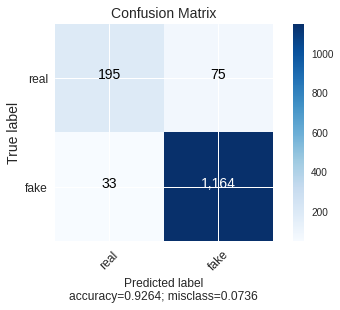

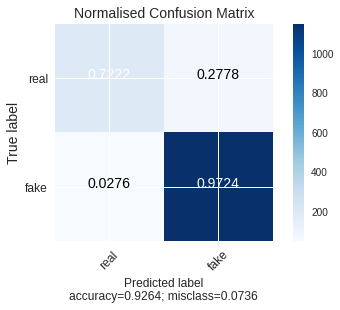



<---------------Final Classification Report-------------------->
              precision    recall  f1-score   support

           0       0.86      0.72      0.78       270
           1       0.94      0.97      0.96      1197

    accuracy                           0.93      1467
   macro avg       0.90      0.85      0.87      1467
weighted avg       0.92      0.93      0.92      1467



Final roc_auc_score : 0.8473266499582288


Final Accuracy : 0.926380


In [ ]:
###################################################################    Blue Cnf matrix after Late Fusion(By Prediction Probabilities)  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title,fontsize=14)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45, fontsize=12)
    plt.yticks(tick_marks, target_names,fontsize=12)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]), fontsize=14 ,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]), fontsize=14,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=14)
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=12)
  plt.savefig('A1 fusion cm.png')
  plt.show()
  

print("<-------------Final Combined Confusion Matrix------------------->")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = False,target_names = ['real','fake'],title = "Confusion Matrix")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = True,target_names = ['real','fake'],title = "Normalised Confusion Matrix")
print("\n")
print("<---------------Final Classification Report-------------------->")
print(classification_report(Y_test,fin_Y_pred_prob))
print("\n")
print("Final roc_auc_score :",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
print("\n")
fin_accuracy = accuracy_score(Y_test, fin_Y_pred_prob)
print('Final Accuracy : %f' % fin_accuracy)

In [ ]:
# ####################################################################     Combining Results of all 2 Classifiers (Late Fusion)  ##############################################
fin_Y_pred_prob = []
w1 = 0.35
w2 = 0.65
#w3 = 0.3
for i in range(len(Y_test)):
  temp = (Y_pred_prob_img[i]*w1 + Y_pred_prob_text[i]*w2)/(w1+w2)
  if(temp>=0.5):
    temp = 1
  else:
    temp = 0
  fin_Y_pred_prob.append(temp)

print(type(fin_Y_pred_prob))
print(len(fin_Y_pred_prob))
print(np.array(fin_Y_pred_prob))

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

cm_final=confusion_matrix(Y_test,fin_Y_pred_prob)
print(cm_final)
print("\n")


<class 'list'>
1467
[1 1 1 ... 1 0 1]
[[ 199   71]
 [  54 1143]]




<-------------Final Combined Confusion Matrix------------------->




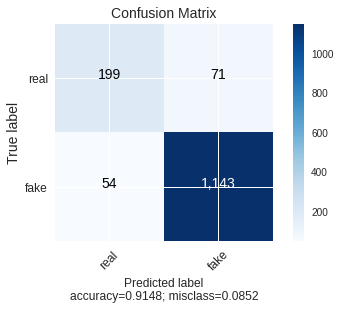

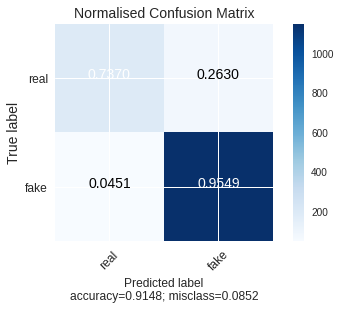



<---------------Final Classification Report-------------------->
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       270
           1       0.94      0.95      0.95      1197

    accuracy                           0.91      1467
   macro avg       0.86      0.85      0.85      1467
weighted avg       0.91      0.91      0.91      1467



Final roc_auc_score : 0.8459621275410749


Final Accuracy : 0.914792


In [ ]:
###################################################################    Blue Cnf matrix after Late Fusion(By Prediction Probabilities)  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title,fontsize=14)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45, fontsize=12)
    plt.yticks(tick_marks, target_names,fontsize=12)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]), fontsize=14 ,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]), fontsize=14,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=14)
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=12)
  plt.savefig('A1 fusion cm.png')
  plt.show()
  

print("<-------------Final Combined Confusion Matrix------------------->")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = False,target_names = ['real','fake'],title = "Confusion Matrix")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = True,target_names = ['real','fake'],title = "Normalised Confusion Matrix")
print("\n")
print("<---------------Final Classification Report-------------------->")
print(classification_report(Y_test,fin_Y_pred_prob))
print("\n")
print("Final roc_auc_score :",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
print("\n")
fin_accuracy = accuracy_score(Y_test, fin_Y_pred_prob)
print('Final Accuracy : %f' % fin_accuracy)

In [ ]:
# ####################################################################     Combining Results of all 2 Classifiers (Late Fusion)  ##############################################
fin_Y_pred_prob = []
w1 = 0.85
w2 = 0.15
#w3 = 0.3
for i in range(len(Y_test)):
  temp = (Y_pred_prob_img[i]*w1 + Y_pred_prob_text[i]*w2)/(w1+w2)
  if(temp>=0.5):
    temp = 1
  else:
    temp = 0
  fin_Y_pred_prob.append(temp)

print(type(fin_Y_pred_prob))
print(len(fin_Y_pred_prob))
print(np.array(fin_Y_pred_prob))

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

cm_final=confusion_matrix(Y_test,fin_Y_pred_prob)
print(cm_final)
print("\n")


<class 'list'>
1467
[1 1 1 ... 1 0 1]
[[ 193   77]
 [  43 1154]]




<-------------Final Combined Confusion Matrix------------------->




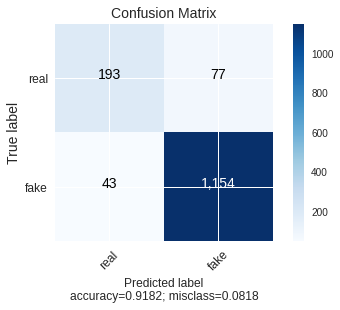

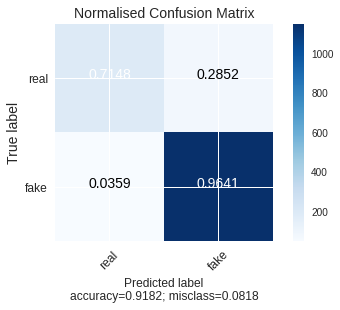



<---------------Final Classification Report-------------------->
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       270
           1       0.94      0.96      0.95      1197

    accuracy                           0.92      1467
   macro avg       0.88      0.84      0.86      1467
weighted avg       0.92      0.92      0.92      1467



Final roc_auc_score : 0.8394458368142579


Final Accuracy : 0.918200


In [ ]:
###################################################################    Blue Cnf matrix after Late Fusion(By Prediction Probabilities)  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title,fontsize=14)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45, fontsize=12)
    plt.yticks(tick_marks, target_names,fontsize=12)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]), fontsize=14 ,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]), fontsize=14,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=14)
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=12)
  plt.savefig('A1 fusion cm.png')
  plt.show()
  

print("<-------------Final Combined Confusion Matrix------------------->")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = False,target_names = ['real','fake'],title = "Confusion Matrix")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = True,target_names = ['real','fake'],title = "Normalised Confusion Matrix")
print("\n")
print("<---------------Final Classification Report-------------------->")
print(classification_report(Y_test,fin_Y_pred_prob))
print("\n")
print("Final roc_auc_score :",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
print("\n")
fin_accuracy = accuracy_score(Y_test, fin_Y_pred_prob)
print('Final Accuracy : %f' % fin_accuracy)

In [ ]:
# ####################################################################     Combining Results of all 2 Classifiers (Late Fusion)  ##############################################
fin_Y_pred_prob = []
w1 = 0.15
w2 = 0.85
#w3 = 0.3
for i in range(len(Y_test)):
  temp = (Y_pred_prob_img[i]*w1 + Y_pred_prob_text[i]*w2)/(w1+w2)
  if(temp>=0.5):
    temp = 1
  else:
    temp = 0
  fin_Y_pred_prob.append(temp)

print(type(fin_Y_pred_prob))
print(len(fin_Y_pred_prob))
print(np.array(fin_Y_pred_prob))

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

cm_final=confusion_matrix(Y_test,fin_Y_pred_prob)
print(cm_final)
print("\n")


<class 'list'>
1467
[1 1 1 ... 1 0 1]
[[ 199   71]
 [  56 1141]]




<-------------Final Combined Confusion Matrix------------------->




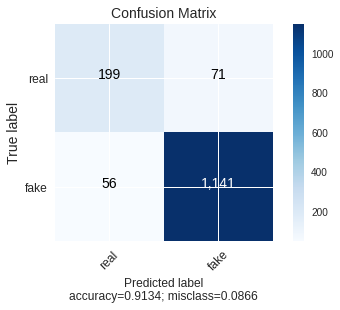

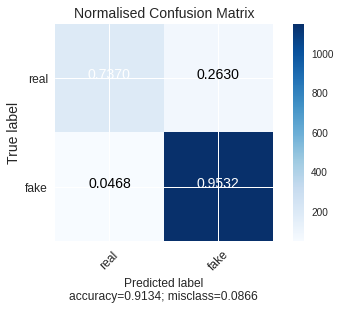



<---------------Final Classification Report-------------------->
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       270
           1       0.94      0.95      0.95      1197

    accuracy                           0.91      1467
   macro avg       0.86      0.85      0.85      1467
weighted avg       0.91      0.91      0.91      1467



Final roc_auc_score : 0.8451267056530214


Final Accuracy : 0.913429


In [ ]:
###################################################################    Blue Cnf matrix after Late Fusion(By Prediction Probabilities)  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title,fontsize=14)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45, fontsize=12)
    plt.yticks(tick_marks, target_names,fontsize=12)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]), fontsize=14 ,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]), fontsize=14,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=14)
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=12)
  plt.savefig('A1 fusion cm.png')
  plt.show()
  

print("<-------------Final Combined Confusion Matrix------------------->")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = False,target_names = ['real','fake'],title = "Confusion Matrix")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = True,target_names = ['real','fake'],title = "Normalised Confusion Matrix")
print("\n")
print("<---------------Final Classification Report-------------------->")
print(classification_report(Y_test,fin_Y_pred_prob))
print("\n")
print("Final roc_auc_score :",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
print("\n")
fin_accuracy = accuracy_score(Y_test, fin_Y_pred_prob)
print('Final Accuracy : %f' % fin_accuracy)

In [ ]:
# ####################################################################     Combining Results of all 2 Classifiers (Late Fusion)  ##############################################
fin_Y_pred_prob = []
w1 = 0.9
w2 = 0.1
#w3 = 0.3
for i in range(len(Y_test)):
  temp = (Y_pred_prob_img[i]*w1 + Y_pred_prob_text[i]*w2)/(w1+w2)
  if(temp>=0.5):
    temp = 1
  else:
    temp = 0
  fin_Y_pred_prob.append(temp)

print(type(fin_Y_pred_prob))
print(len(fin_Y_pred_prob))
print(np.array(fin_Y_pred_prob))

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

cm_final=confusion_matrix(Y_test,fin_Y_pred_prob)
print(cm_final)
print("\n")


<class 'list'>
1467
[1 1 1 ... 1 0 1]
[[ 193   77]
 [  45 1152]]




<-------------Final Combined Confusion Matrix------------------->




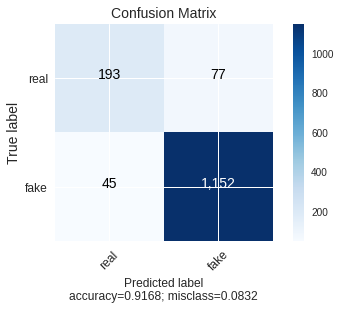

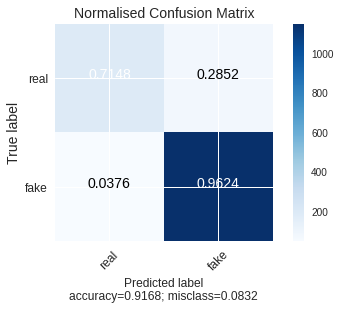



<---------------Final Classification Report-------------------->
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       270
           1       0.94      0.96      0.95      1197

    accuracy                           0.92      1467
   macro avg       0.87      0.84      0.85      1467
weighted avg       0.91      0.92      0.91      1467



Final roc_auc_score : 0.8386104149262044


Final Accuracy : 0.916837


In [ ]:
###################################################################    Blue Cnf matrix after Late Fusion(By Prediction Probabilities)  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title,fontsize=14)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45, fontsize=12)
    plt.yticks(tick_marks, target_names,fontsize=12)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]), fontsize=14 ,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]), fontsize=14,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=14)
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=12)
  plt.savefig('A1 fusion cm.png')
  plt.show()
  

print("<-------------Final Combined Confusion Matrix------------------->")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = False,target_names = ['real','fake'],title = "Confusion Matrix")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = True,target_names = ['real','fake'],title = "Normalised Confusion Matrix")
print("\n")
print("<---------------Final Classification Report-------------------->")
print(classification_report(Y_test,fin_Y_pred_prob))
print("\n")
print("Final roc_auc_score :",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
print("\n")
fin_accuracy = accuracy_score(Y_test, fin_Y_pred_prob)
print('Final Accuracy : %f' % fin_accuracy)

In [ ]:
# ####################################################################     Combining Results of all 2 Classifiers (Late Fusion)  ##############################################
fin_Y_pred_prob = []
w1 = 0.1
w2 = 0.9
#w3 = 0.3
for i in range(len(Y_test)):
  temp = (Y_pred_prob_img[i]*w1 + Y_pred_prob_text[i]*w2)/(w1+w2)
  if(temp>=0.5):
    temp = 1
  else:
    temp = 0
  fin_Y_pred_prob.append(temp)

print(type(fin_Y_pred_prob))
print(len(fin_Y_pred_prob))
print(np.array(fin_Y_pred_prob))

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

cm_final=confusion_matrix(Y_test,fin_Y_pred_prob)
print(cm_final)
print("\n")


<class 'list'>
1467
[1 1 1 ... 1 0 1]
[[ 199   71]
 [  56 1141]]




<-------------Final Combined Confusion Matrix------------------->




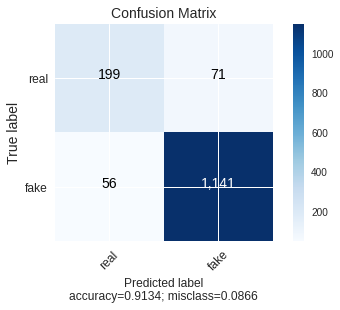

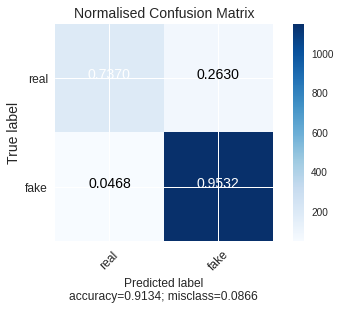



<---------------Final Classification Report-------------------->
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       270
           1       0.94      0.95      0.95      1197

    accuracy                           0.91      1467
   macro avg       0.86      0.85      0.85      1467
weighted avg       0.91      0.91      0.91      1467



Final roc_auc_score : 0.8451267056530214


Final Accuracy : 0.913429


In [ ]:
###################################################################    Blue Cnf matrix after Late Fusion(By Prediction Probabilities)  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title,fontsize=14)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45, fontsize=12)
    plt.yticks(tick_marks, target_names,fontsize=12)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]), fontsize=14 ,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]), fontsize=14,
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label',fontsize=14)
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=12)
  plt.savefig('A1 fusion cm.png')
  plt.show()
  

print("<-------------Final Combined Confusion Matrix------------------->")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = False,target_names = ['real','fake'],title = "Confusion Matrix")
print("\n")
plot_confusion_matrix(cm1 =cm_final, normalize = True,target_names = ['real','fake'],title = "Normalised Confusion Matrix")
print("\n")
print("<---------------Final Classification Report-------------------->")
print(classification_report(Y_test,fin_Y_pred_prob))
print("\n")
print("Final roc_auc_score :",roc_auc_score(Y_test, fin_Y_pred_prob, average='macro'))
print("\n")
fin_accuracy = accuracy_score(Y_test, fin_Y_pred_prob)
print('Final Accuracy : %f' % fin_accuracy)